In [1]:
from Config import *
from Dataset import *
from Experiments import *
from Metric import *
from Model import *
from Utils import *
from FID import *
from Train import *

import gc


1.13.1


In [5]:
class set_args:
    def __init__(self):
        self.seed = 5
        self.state = 'train'
        self.epochs = 30 # training epochs
        self.batch_size = 80
        self.dataset = 'MNIST'#'MNIST'#'CIFAR10' 
        self.split_class= [1]

        #Load different model if TRUE
        self.load_different_model = False
        self.load_training_checkpoint = 30 #30,#200
        self.load_rd_training_checkpoint = 29

        self.sample_dir = 'Result'
        self.checkpoint_dir = 'Result'
        self.M = [1]
        self.I = [0]

        #Reduce training sample
        self.rd = 0.05

        self.save_weight_dir = 'Result/CheckpointsMNIST/'
        self.load_weight_dir = 'Result/CheckpointsMNIST/'
        
        
#directory_init()

args = set_args()
seed_everything(args.seed) 

"""Merge both these"""
model_config = set_config(args, custom_dataset=args.dataset) 

model, sampler, trainer = model_init(args, model_config)

"""Handle these afterward"""
#h_info_sampledImgs = sampler.load_h_information()
#xt_info_sampledImgs = sampler.load_xt_information()


"""Modifiying"""
#expriment1 = Experiment_1(args, model_config, model, sampler, trainer)
#expriment1.plot_sim()

Config : MNIST
Config : haha
loading model : 1_ckpt_30_.pt ......


c:\Users\mw_st\OneDrive\桌面\DDPM_XAI\Utils.py:799: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(


model load weight done.
update Sampler ...... done
update Trainer ...... done


'Modifiying'

Timestep 999 add to h space information and xt information.
Timestep 998 add to h space information and xt information.
Timestep 997 add to h space information and xt information.
Timestep 996 add to h space information and xt information.
Timestep 995 add to h space information and xt information.
Timestep 994 add to h space information and xt information.
Timestep 993 add to h space information and xt information.
Timestep 992 add to h space information and xt information.
Timestep 991 add to h space information and xt information.
Timestep 990 add to h space information and xt information.
Timestep 989 add to h space information and xt information.
Timestep 988 add to h space information and xt information.
Timestep 987 add to h space information and xt information.
Timestep 986 add to h space information and xt information.
Timestep 985 add to h space information and xt information.
Timestep 984 add to h space information and xt information.
Timestep 983 add to h space information 

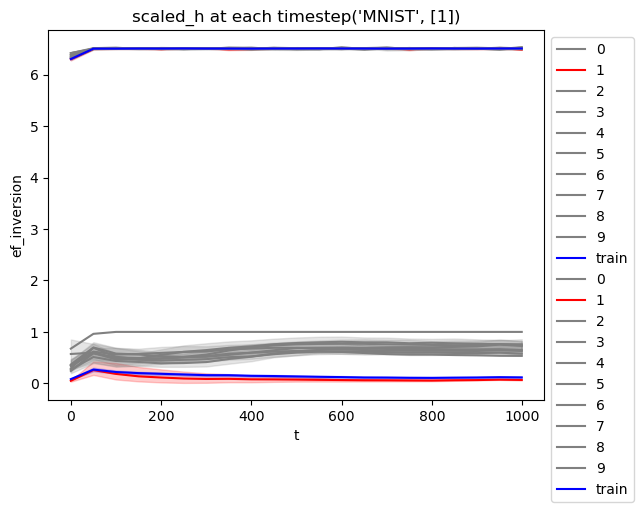

In [6]:
expriment1 = Experiment_1(args, model_config, model, sampler, trainer)
expriment1.plot_sim()

In [7]:
df_anchor = expriment1.df_anchor

"""pass"""
#df_anchor_is_train = df_anchor[df_anchor['is_train']==True]
#df_anchor_not_train = df_anchor[df_anchor['is_train']==False]

'pass'

# FID


In [8]:
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[2048]
InceptionV3_model = InceptionV3([block_idx])
InceptionV3_model=InceptionV3_model.cuda()

c:\Users\mw_st\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mw_st\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
#real = sampledImgs
#fake = dt
#fretchet_dist=calculate_fretchet(real,fake,InceptionV3_model) 

In [10]:
#fretchet_dist

In [11]:
#grid = make_grid(fake, nrow=8).permute(1, 2, 0).cpu().numpy()

#plt.figure(figsize=(10, 10))
#plt.imshow(grid)
#plt.axis('off')
#plt.show()

# Calculate weight for eliminated from training 


In [12]:
"""pass"""
#df_anchor_is_train_mean = df_anchor_is_train.groupby(['idx'])[['scaled_ef_inversion','scaled_h']].mean().reset_index()
#df_anchor_is_train_mean['weight'] = (df_anchor_is_train_mean['scaled_ef_inversion'] + df_anchor_is_train_mean['scaled_h']) / 2
#df_anchor_is_train_mean

'pass'

In [13]:
#df_anchor_is_train_mean = df_anchor_is_train_mean.sort_values(by='weight')

In [14]:
#reduced_sort_idx = np.array(df_anchor_is_train_mean['idx'])

In [15]:
reduced_sort_idx = create_reduce_idx(args, df_anchor)

# Reduced Data

In [16]:
#reduced_percentile = 0.1

#dt_train = CUSTOM_DATASET(args, split=True)
#train_dataset, _ = dt_train.load_dataset(custom_trasform=True)
#HIHE_reduced_data = Subset(train_dataset, list(reduced_sort_idx[int(len(reduced_sort_idx)*reduced_percentile):]))

In [17]:
#HIHE_reduced_data = create_reduced_data(args, reduced_sort_idx, model_config)

# Training

In [18]:
train_new(args, reduced_sort_idx, model_config)

0it [00:02, ?it/s]
c:\Users\mw_st\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
c:\Users\mw_st\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:1063: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s]
0it [00:02, ?it/s

In [19]:
#evaluate(args, model_config)

In [20]:
"""
#def load_rd_model(args, modelConfig):
modelConfig = model_config
args.load_different_model = True
with torch.no_grad():
    device = torch.device(model_config["device"])
    model = UNet(T=modelConfig["T"], ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"], attn=modelConfig["attn"],
                    num_res_blocks=modelConfig["num_res_blocks"], dropout=0.)


    ckpt = torch.load(os.path.join(
        modelConfig["test_load_weight"]), map_location=device)
    model.load_state_dict(ckpt)
    print("model load weight done.")
    model.eval()
    sampler = GaussianDiffusionSampler(
        model, modelConfig["beta_1"], modelConfig["beta_T"], modelConfig["T"]).to(device)

#return model
"""
"""
def generate_sameple_img(args, model_config):
    with torch.no_grad():
        model.eval()
        noisyImage = torch.randn(
        size=[model_config["batch_size"], 3, 32, 32], device="cuda")
        saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)
        sampledImgs = sampler(noisyImage)

    return sampledImgs
"""

'\ndef generate_sameple_img(args, model_config):\n    with torch.no_grad():\n        model.eval()\n        noisyImage = torch.randn(\n        size=[model_config["batch_size"], 3, 32, 32], device="cuda")\n        saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)\n        sampledImgs = sampler(noisyImage)\n\n    return sampledImgs\n'

In [21]:

torch.cuda.empty_cache()
gc.collect()

4384

In [ ]:
rd_model, rd_sampler, rd_trainer = model_init(args, model_config, rd=True)
fake = generate_sameple_img(args, model_config, rd_model, rd_sampler)


"""
with torch.no_grad():
    model.eval()
    noisyImage = torch.randn(
    size=[model_config["batch_size"], 3, 32, 32], device="cuda")
    saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)
    sampledImgs = rd_sampler(noisyImage)
"""
#fake = sampledImgs

fid_dt_train = CUSTOM_DATASET(args, split=True)
fid_train_dataset, _ = fid_dt_train.load_dataset(custom_trasform=True)

dt_loader = DataLoader(fid_train_dataset, batch_size=fake.shape[0], shuffle=False)

for dt, i in dt_loader:
    print(dt.shape)
    break

real = dt
fretchet_dist = calculate_fretchet(real,fake,InceptionV3_model) 

Config : haha
loading model : rd5_c1_ckpt_29_.pt ......


c:\Users\mw_st\OneDrive\桌面\DDPM_XAI\Utils.py:799: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(


model load weight done.
update Sampler ...... done
update Trainer ...... done
Timestep 999 add to h space information and xt information.
Timestep 998 add to h space information and xt information.
Timestep 997 add to h space information and xt information.
Timestep 996 add to h space information and xt information.
Timestep 995 add to h space information and xt information.
Timestep 994 add to h space information and xt information.
Timestep 993 add to h space information and xt information.
Timestep 992 add to h space information and xt information.
Timestep 991 add to h space information and xt information.
Timestep 990 add to h space information and xt information.
Timestep 989 add to h space information and xt information.
Timestep 988 add to h space information and xt information.
Timestep 987 add to h space information and xt information.
Timestep 986 add to h space information and xt information.
Timestep 985 add to h space information and xt information.
Timestep 984 add to h 

In [ ]:
fretchet_dist

419.9346600388674

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


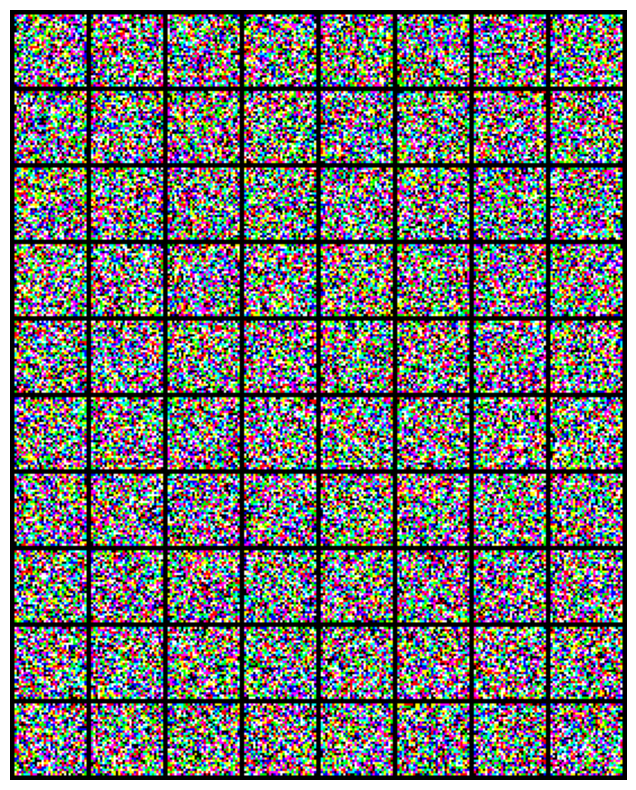

In [ ]:
grid = make_grid(fake, nrow=8).permute(1, 2, 0).cpu().numpy()

plt.figure(figsize=(10, 10))
plt.imshow(grid)
plt.axis('off')
plt.show()

# Experiment 2

In [ ]:
class Experiment_2:
    """Calculate Frechet Distance"""
    def __init__(self, args, model_config, experiment_1_df):
        df_istrain = experiment_1_df[experiment_1_df['is_train'] == True]
        df_istest = experiment_1_df[experiment_1_df['is_train'] == False]
        self.anchor_train_mean_df = self._calc_asc_weight_df(df_istrain, df_istrain)
        self.anchor_test_mean_df = self._calc_asc_weight_df(df_istest, df_istrain)
    
    def plot_sim(self):
        palette = {
            str(i): 'red' if str(i) == str(args.split_class[0]) else 'grey'
            for i in range(10)
        }
        palette['train'] = 'blue'  # Adding 'train' key separately
        hue_order = ['0','1','2','3','4','5','6','7','8','9','train']

        concat_df = pd.concat([self.anchor_train_mean_df, self.anchor_test_mean_df],axis=0).reset_index()

        fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Adjust figure size as needed

        sns.boxplot(ax=axes[0], data=concat_df, x='label',y='fd_h', hue_order=hue_order, palette=palette, order=hue_order)
        axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moves the legend to the right
        axes[0].set_title(f'Fréchet distance of scaled h{args.dataset,args.split_class}')


        #hue_order = ['0','1','2','3','4','5','6','7','8','9']

        sns.boxplot(ax=axes[1], data=concat_df, x='label',y='fd_ef', hue_order=hue_order, palette=palette, order=hue_order)
        axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moves the legend to the right
        axes[1].set_title(f'Fréchet distance of scaled extrinsic{args.dataset,args.split_class}')

        sns.scatterplot(data=concat_df, x="fd_ef", y="fd_h", hue="label", palette=palette)
        axes[2].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moves the legend to the right
        axes[2].set_title(f'Quadrant plot of anchor {args.dataset,args.split_class}')

        
    def _calc_asc_weight_df(self, input_df, compared_df):
        fd_h_lst = []
        fd_ef_lst = []
        label_lst = []
        compare_t = input_df['t'].unique()

        num_train = len(input_df['idx'].unique())



        #calculate training data
        for i in input_df['idx'].unique():
            fd_h = 0
            fd_ef = 0

            df_istrain_i = input_df[input_df['idx']==i]
            is_train_i_h_arr = np.array(df_istrain_i['scaled_h'])
            is_train_i_ef_arr = np.array(df_istrain_i['scaled_ef_inversion'])
            compare_h_P = np.vstack([compare_t, is_train_i_h_arr]).T
            compare_ef_P = np.vstack([compare_t, is_train_i_ef_arr]).T

            for counter, j in enumerate(compared_df['idx'].unique()):
                if i == j:
                    continue
                if counter > 80:
                    break
                
                df_istrain_j = compared_df[compared_df['idx']==j]
                is_train_j_h_arr = np.array(df_istrain_j['scaled_h'])
                is_train_j_ef_arr = np.array(df_istrain_j['scaled_ef_inversion'])
                compare_h_Q = np.vstack([compare_t, is_train_j_h_arr]).T
                compare_ef_Q = np.vstack([compare_t, is_train_j_ef_arr]).T
                
                fd_h += self._frechet_distance(compare_h_P, compare_h_Q) / num_train
                fd_ef += self._frechet_distance(compare_ef_P, compare_ef_Q) / num_train


            fd_h_lst.append(fd_h)
            fd_ef_lst.append(fd_ef)
            label_lst.append(input_df.iloc[i].label)

        input_df_mean = input_df.groupby(['idx','label'])[['scaled_h','scaled_ef_inversion']].mean().reset_index()
        fd_df = pd.DataFrame([fd_h_lst, fd_ef_lst]).T
        fd_df.columns = ['fd_h','fd_ef']
        anchor_mean_df = pd.concat([input_df_mean,fd_df],axis=1)

        return anchor_mean_df

    def _euclidean(self, p1, p2):
        return np.linalg.norm(np.array(p1) - np.array(p2))

    def _frechet_recursive(self, ca, P, Q, i, j):
        if ca[i, j] > -1:
            return ca[i, j]
        elif i == 0 and j == 0:
            ca[i, j] = self._euclidean(P[0], Q[0])
        elif i > 0 and j == 0:
            ca[i, j] = max(self._frechet_recursive(ca, P, Q, i-1, 0), self._euclidean(P[i], Q[0]))
        elif i == 0 and j > 0:
            ca[i, j] = max(self._frechet_recursive(ca, P, Q, 0, j-1), self._euclidean(P[0], Q[j]))
        elif i > 0 and j > 0:
            ca[i, j] = max(min(self._frechet_recursive(ca, P, Q, i-1, j),
                            self._frechet_recursive(ca, P, Q, i-1, j-1),
                            self._frechet_recursive(ca, P, Q, i, j-1)),
                        self._euclidean(P[i], Q[j]))
        else:
            ca[i, j] = float('inf')
        return ca[i, j]

    def _frechet_distance(self, P, Q):
        ca = np.ones((len(P), len(Q))) * -1
        return self._frechet_recursive(ca, P, Q, len(P)-1, len(Q)-1)

Config : MNIST
Config : haha
loading model : 1_ckpt_30_.pt ......


c:\Users\mw_st\OneDrive\桌面\DDPM_XAI\Utils.py:799: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(


model load weight done.
update Sampler ...... done
update Trainer ...... done
Timestep 999 add to h space information and xt information.
Timestep 998 add to h space information and xt information.
Timestep 997 add to h space information and xt information.
Timestep 996 add to h space information and xt information.
Timestep 995 add to h space information and xt information.
Timestep 994 add to h space information and xt information.
Timestep 993 add to h space information and xt information.
Timestep 992 add to h space information and xt information.
Timestep 991 add to h space information and xt information.
Timestep 990 add to h space information and xt information.
Timestep 989 add to h space information and xt information.
Timestep 988 add to h space information and xt information.
Timestep 987 add to h space information and xt information.
Timestep 986 add to h space information and xt information.
Timestep 985 add to h space information and xt information.
Timestep 984 add to h 

c:\Users\mw_st\OneDrive\桌面\DDPM_XAI\Experiments.py:270: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=concat_df, x='label',y='fd_h', hue_order=hue_order, palette=palette, order=hue_order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\mw_st\OneDrive\桌面\DDPM_XAI\Experiments.py:279: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=concat_df, x='label',y='fd_ef', hue_order=hue_order, palette=palette, order=hue_order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() i

experiment 2 Done ......


c:\Users\mw_st\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mw_st\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training ...... Epoch : 1


100%|██████████| 2/2 [00:12<00:00,  6.48s/it, epoch=1, loss: =245, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 2


100%|██████████| 2/2 [00:12<00:00,  6.48s/it, epoch=2, loss: =244, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]
c:\Users\mw_st\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:1063: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


Training ...... Epoch : 3


100%|██████████| 2/2 [00:12<00:00,  6.46s/it, epoch=3, loss: =240, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0002]


Training ...... Epoch : 4


100%|██████████| 2/2 [00:12<00:00,  6.44s/it, epoch=4, loss: =236, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000195]


Training ...... Epoch : 5


100%|██████████| 2/2 [00:13<00:00,  6.69s/it, epoch=5, loss: =235, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000181]


Training ...... Epoch : 6


100%|██████████| 2/2 [00:12<00:00,  6.46s/it, epoch=6, loss: =235, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000159]


Training ...... Epoch : 7


100%|██████████| 2/2 [00:13<00:00,  6.57s/it, epoch=7, loss: =223, img shape: =torch.Size([80, 3, 32, 32]), LR=0.000131]


Training ...... Epoch : 8


100%|██████████| 2/2 [00:12<00:00,  6.49s/it, epoch=8, loss: =205, img shape: =torch.Size([80, 3, 32, 32]), LR=0.0001]


Training ...... Epoch : 9


100%|██████████| 2/2 [00:13<00:00,  6.52s/it, epoch=9, loss: =193, img shape: =torch.Size([80, 3, 32, 32]), LR=6.91e-5]


Training ...... Epoch : 10


100%|██████████| 2/2 [00:13<00:00,  6.54s/it, epoch=10, loss: =183, img shape: =torch.Size([80, 3, 32, 32]), LR=4.12e-5]


Training reduced model Done ......


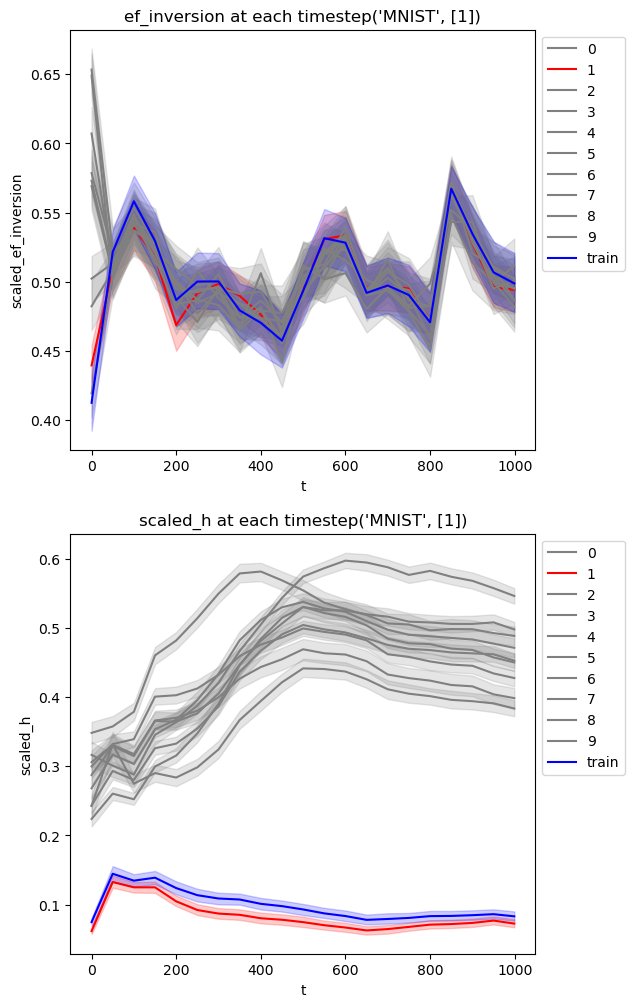

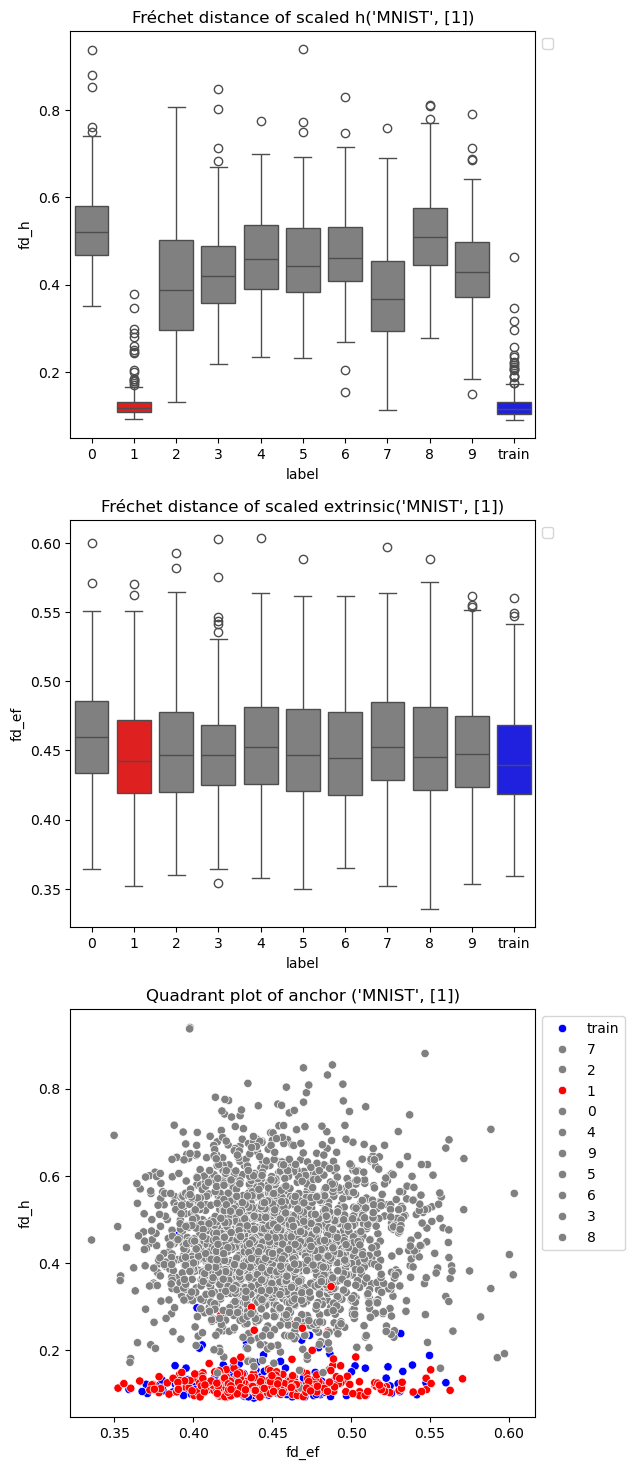

In [2]:
class set_args:
    def __init__(self):
        self.seed = 5
        self.state = 'train'
        self.epochs = 10 # training epochs
        self.batch_size = 80
        self.dataset = 'MNIST'#'MNIST'#'CIFAR10' 
        self.split_class= [1]

        #Load different model if TRUE
        self.load_different_model = False
        self.load_training_checkpoint = 30 #30,#200
        self.load_rd_training_checkpoint = 29

        self.sample_dir = 'Result'
        self.checkpoint_dir = 'Result'
        self.M = [1]
        self.I = [0]

        #Reduce training sample
        self.rd = 0.05

        self.save_weight_dir = 'Result/CheckpointsMNIST/'

        
    
directory_init()

args = set_args()
seed_everything(args.seed) 

"""Merge both these"""
model_config = set_config(args, custom_dataset=args.dataset) 

model, sampler, trainer = model_init(args, model_config)

"""Handle these afterward"""
#h_info_sampledImgs = sampler.load_h_information()
#xt_info_sampledImgs = sampler.load_xt_information()



expriment1 = Experiment_1(args, model_config, model, sampler, trainer)
expriment1.plot_sim()

df_anchor = expriment1.df_anchor

print("Experiment 1 Done ......")

exp2 = Experiment_2(args, model_config, df_anchor)
train_mean_anchor = exp2.anchor_train_mean_df
exp2.plot_sim()

print("experiment 2 Done ......")

# FID

block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[2048]
InceptionV3_model = InceptionV3([block_idx])
InceptionV3_model=InceptionV3_model.cuda()

# create indices
reduced_sort_idx = create_reduce_idx(args, train_mean_anchor)
train_new(args, reduced_sort_idx, model_config)
print("Training reduced model Done ......")